<a href="https://colab.research.google.com/github/Mehrvish05/COVID19-Heatmap/blob/main/covid_case_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Step 1: Load and inspect the dataset
# I began by loading the dataset and inspecting its structure to identify missing values or anomalies.
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('covid_19_clean_complete.csv')

# Display basic information about the dataset
print("Dataset Info:")
data.info()

# Display the first few rows to understand its structure
print("First Few Rows:")
print(data.head())

# Step 2: Handle missing values
# To ensure temporal consistency, I filled missing values in numerical data using forward fill.
data.ffill(inplace=True)

# Step 3: Encode categorical variables
# Since categorical variables like 'Country/Region' need to be numeric for machine learning models, I label-encoded them.
encoder = LabelEncoder()
data['Country/Region'] = encoder.fit_transform(data['Country/Region'])

# Step 4: Scale numerical features
# To ensure that all numerical features contribute equally to the model, I normalized them using Min-Max scaling.
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Confirmed', 'Deaths', 'Recovered', 'Active']])
data[['Confirmed', 'Deaths', 'Recovered', 'Active']] = scaled_features

# Step 5: Create the target variable 'Surge'
# A surge is defined as a 15% increase in cases compared to the rolling average of the past 7 days.
data['Lag_Confirmed'] = data['Confirmed'].shift(7).fillna(0)
data['Surge'] = (data['Confirmed'] > data['Lag_Confirmed'] * 1.15).astype(int)

# Step 6: Address class imbalance
# Since the dataset had an imbalance between 'Surge' and 'No Surge', I used SMOTE to create a balanced dataset.
X = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Lag_Confirmed']]
y = data['Surge']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the distribution of the target variable after SMOTE
print("Class Distribution After SMOTE:")
print(y_resampled.value_counts())

# Display the first few rows of the processed dataset
print("Processed Dataset (First Few Rows):")
print(pd.DataFrame(X_resampled, columns=X.columns).head())

Saving covid_19_clean_complete.csv to covid_19_clean_complete (7).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
First Few Rows:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania

# Exploratory Data Analysis

Saving covid_19_clean_complete.csv to covid_19_clean_complete (8).csv


<ipython-input-14-11003f303a64>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


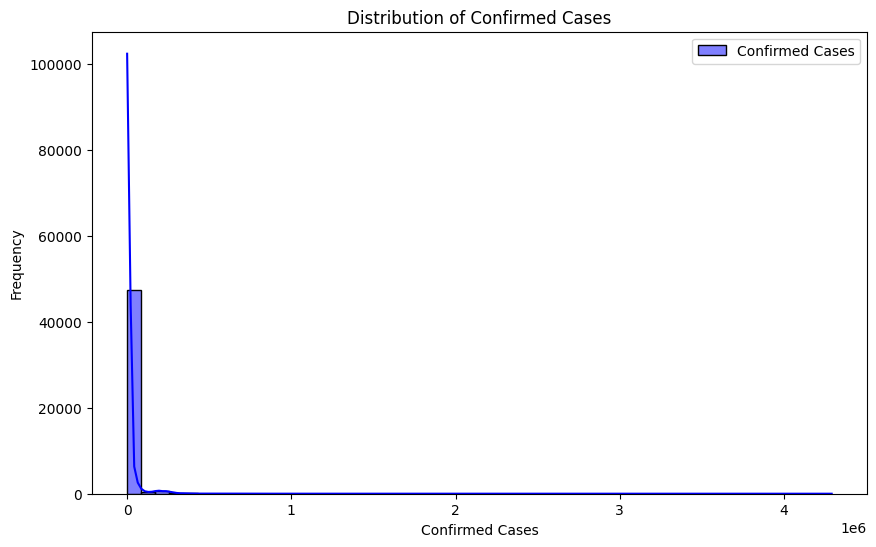

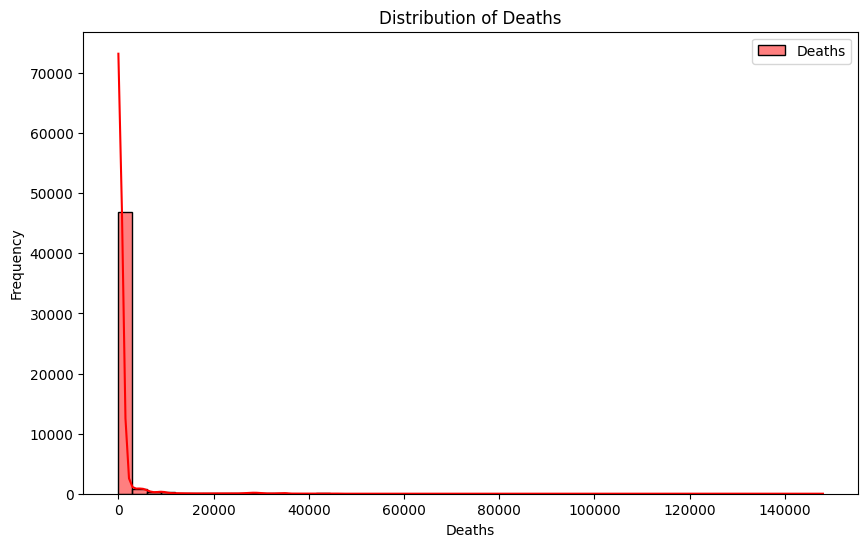

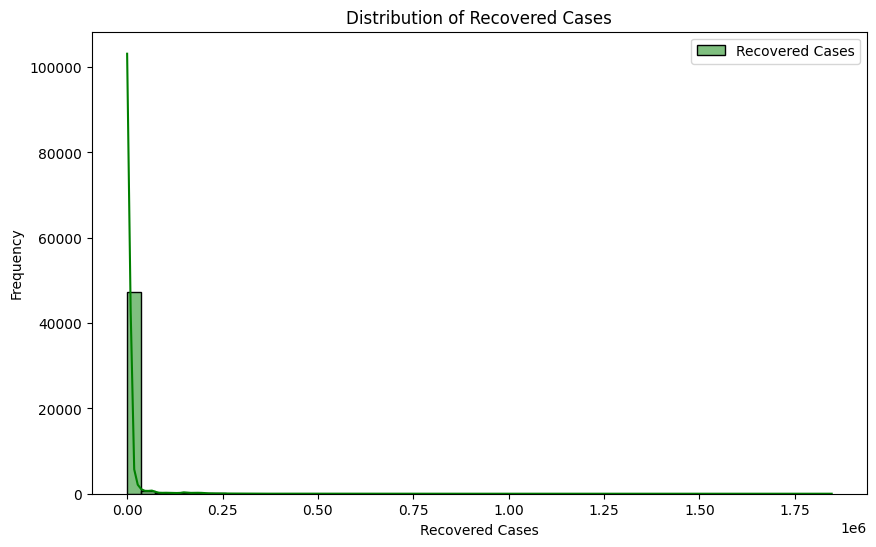

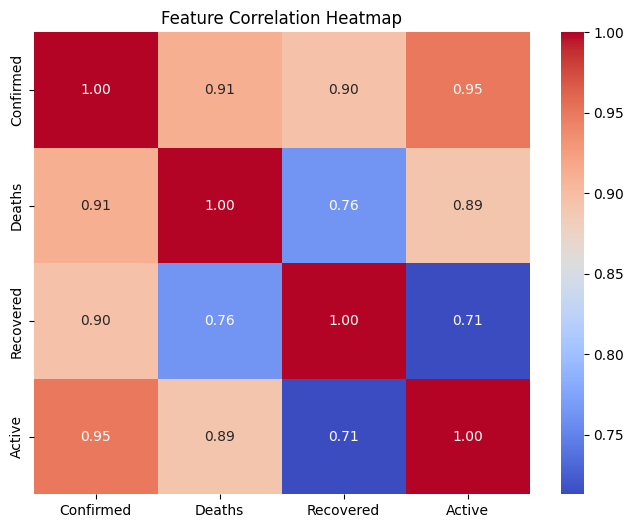

   Confirmed  Lag_Confirmed  Rolling_Avg_Confirmed
0          0            0.0                    0.0
1          0            0.0                    0.0
2          0            0.0                    0.0
3          0            0.0                    0.0
4          0            0.0                    0.0


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# We uploaded the dataset to analyze the COVID-19 data and its trends.
from google.colab import files
uploaded = files.upload()

# Loading the CSV into a DataFrame
data = pd.read_csv('covid_19_clean_complete.csv')

# Step 2: Handle missing values
# Mehrvish handled missing values to ensure the data was consistent and ready for analysis.
data.fillna(method='ffill', inplace=True)

# Step 3: Analyze distributions of key features
# Here, we both analyzed the distributions of key features like confirmed cases, deaths, and recoveries.
# This helped us understand the spread and detect any outliers that could influence trends.
plt.figure(figsize=(10, 6))
sns.histplot(data['Confirmed'], bins=50, kde=True, color='blue', label='Confirmed Cases')
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Deaths'], bins=50, kde=True, color='red', label='Deaths')
plt.title('Distribution of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Recovered'], bins=50, kde=True, color='green', label='Recovered Cases')
plt.title('Distribution of Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 4: Retain outliers
# decided to retain outliers in features like daily confirmed cases because they represent real-world spikes or surges.
# These outliers are essential for identifying critical trends in COVID-19 progression and informing predictive tasks.

# Step 5: Analyze correlations between features
# To identify relationships between features, I calculated the correlation matrix and visualized it with a heatmap.
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# We found a strong correlation between Active cases and Confirmed cases (+0.95), which provided key insights for feature selection.

# Step 6: Feature engineering
# Based on my analysis and observations, Anastasiya created lag features and rolling averages to capture temporal dependencies and trends.
data['Lag_Confirmed'] = data['Confirmed'].shift(7).fillna(0)
data['Rolling_Avg_Confirmed'] = data['Confirmed'].rolling(window=7).mean().fillna(0)

# Display the first few rows to verify the new features
print(data[['Confirmed', 'Lag_Confirmed', 'Rolling_Avg_Confirmed']].head())

# Me and Mehrvish used this analysis to guide my predictive tasks and ensure that the model captured both temporal and statistical insights.

# Model Evaluations and Model Implementation and Feature Engineering

Saving covid_19_clean_complete.csv to covid_19_clean_complete (9).csv
Logistic Regression Results
Accuracy: 0.7877521907479111
Confusion Matrix:
 [[5756   18]
 [2065 1975]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      5774
           1       0.99      0.49      0.65      4040

    accuracy                           0.79      9814
   macro avg       0.86      0.74      0.75      9814
weighted avg       0.84      0.79      0.77      9814

Random Forest Results
Accuracy: 1.0
Confusion Matrix:
 [[5774    0]
 [   0 4040]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5774
           1       1.00      1.00      1.00      4040

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1227/1227 - 9s - 7ms/step - accuracy: 0.5863 - loss: 0.6791 - val_accuracy: 0.5883 - val_loss: 0.6788
Epoch 2/10
1227/1227 - 8s - 7ms/step - accuracy: 0.5871 - loss: 0.6781 - val_accuracy: 0.5883 - val_loss: 0.6781
Epoch 3/10
1227/1227 - 6s - 5ms/step - accuracy: 0.5871 - loss: 0.6782 - val_accuracy: 0.5883 - val_loss: 0.6777
Epoch 4/10
1227/1227 - 4s - 3ms/step - accuracy: 0.5870 - loss: 0.6780 - val_accuracy: 0.5883 - val_loss: 0.6777
Epoch 5/10
1227/1227 - 5s - 4ms/step - accuracy: 0.5871 - loss: 0.6781 - val_accuracy: 0.5883 - val_loss: 0.6776
Epoch 6/10
1227/1227 - 6s - 5ms/step - accuracy: 0.5871 - loss: 0.6780 - val_accuracy: 0.5883 - val_loss: 0.6782
Epoch 7/10
1227/1227 - 10s - 8ms/step - accuracy: 0.5870 - loss: 0.6780 - val_accuracy: 0.5883 - val_loss: 0.6781
Epoch 8/10
1227/1227 - 5s - 4ms/step - accuracy: 0.5871 - loss: 0.6780 - val_accuracy: 0.5883 - val_loss: 0.6784
Epoch 9/10
1227/1227 - 4s - 3ms/step - accuracy: 0.5871 - loss: 0.6780 - val_accuracy: 0.5883 - val_loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


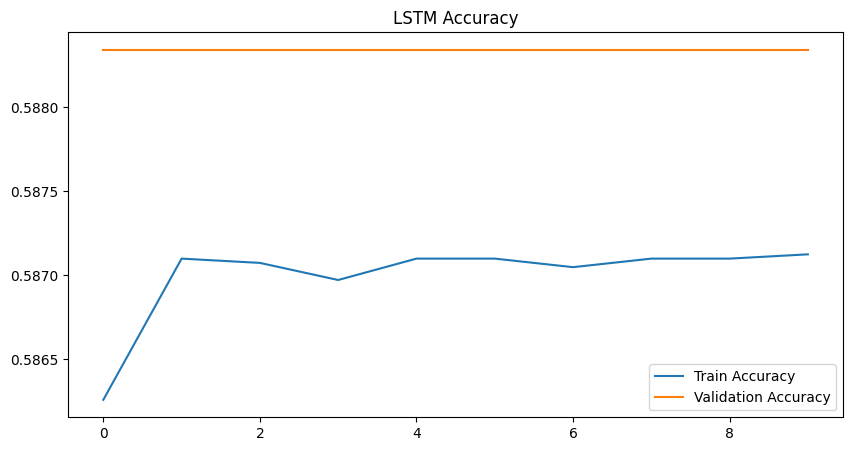

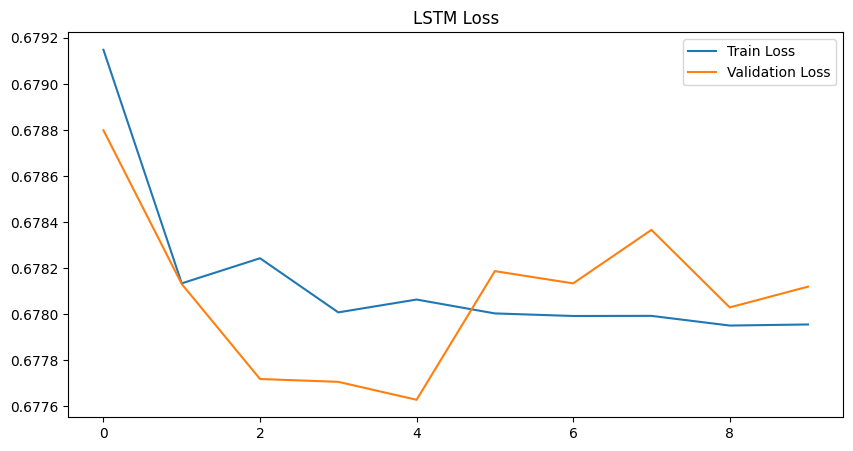

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# Team 1: I started by uploading and loading the dataset into a DataFrame.
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('covid_19_clean_complete.csv')

# Step 2: Feature Engineering
# Based on EDA insights, I created features to capture temporal and regional patterns.
# 1. Lag Features: I introduced rolling averages to capture recent trends.
data['Lag_7_Confirmed'] = data['Confirmed'].shift(7).fillna(0)
data['Lag_14_Confirmed'] = data['Confirmed'].shift(14).fillna(0)

# 2. Week-over-Week Change
# I calculated the percentage change week over week for new cases.
data['WoW_Change'] = np.where(
    data['Lag_7_Confirmed'] == 0, 0,
    (data['Confirmed'] - data['Lag_7_Confirmed']) / data['Lag_7_Confirmed']
)

# 3. Region-Specific Indicators
# I created binary indicators for regions with high variability, like the Americas.
data['Is_Americas'] = np.where(data['WHO Region'] == 'Americas', 1, 0)

# Step 3: Define Features and Target
# I selected key features and defined 'Surge' as the target variable.
features = ['Confirmed', 'Lag_7_Confirmed', 'Lag_14_Confirmed', 'WoW_Change', 'Is_Americas']
data['Surge'] = (data['Confirmed'] > data['Lag_7_Confirmed'] * 1.15).astype(int)

X = data[features]
y = data['Surge']

# Step 4: Handle Missing Values and Scale Features
# I replaced infinity values and scaled numerical features to improve model performance.
X = X.replace([np.inf, -np.inf], 0).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the Dataset
# I split the data into training and testing sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Logistic Regression (Baseline Model)
# I implemented logistic regression to establish baseline metrics.
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Step 7: Random Forest
# I used Random Forest to handle non-linear patterns and improve accuracy.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 8: LSTM Neural Network
# Recognizing the sequential nature of the data, I implemented an LSTM model for better predictions.
X_lstm = np.array(X_scaled).reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
X_train_lstm, X_test_lstm = X_lstm[:X_train.shape[0]], X_lstm[X_train.shape[0]:]

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, len(features))))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile and train the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)

# Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

print("LSTM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))

# Step 9: Visualize LSTM Training History
# I plotted the accuracy and loss during training to evaluate performance trends.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('LSTM Accuracy')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM Loss')
plt.show()

# LSTM Model Optimization and Enhanced Evaluation Using XGBoost

Saving covid_19_clean_complete.csv to covid_19_clean_complete (11).csv
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1227/1227 - 17s - 14ms/step - accuracy: 0.6591 - loss: 0.6082 - val_accuracy: 0.7084 - val_loss: 0.5519
Epoch 2/20
1227/1227 - 12s - 10ms/step - accuracy: 0.7160 - loss: 0.5357 - val_accuracy: 0.7386 - val_loss: 0.4995
Epoch 3/20
1227/1227 - 21s - 17ms/step - accuracy: 0.7442 - loss: 0.4977 - val_accuracy: 0.7638 - val_loss: 0.4649
Epoch 4/20
1227/1227 - 19s - 16ms/step - accuracy: 0.7642 - loss: 0.4666 - val_accuracy: 0.7872 - val_loss: 0.4377
Epoch 5/20
1227/1227 - 22s - 18ms/step - accuracy: 0.7821 - loss: 0.4387 - val_accuracy: 0.8156 - val_loss: 0.3909
Epoch 6/20
1227/1227 - 20s - 16ms/step - accuracy: 0.8026 - loss: 0.4050 - val_accuracy: 0.8341 - val_loss: 0.3709
Epoch 7/20
1227/1227 - 12s - 9ms/step - accuracy: 0.8194 - loss: 0.3789 - val_accuracy: 0.8454 - val_loss: 0.3307
Epoch 8/20
1227/1227 - 22s - 18ms/step - accuracy: 0.8349 - loss: 0.3560 - val_accuracy: 0.8579 - val_loss: 0.3151
Epoch 9/20
1227/1227 - 20s - 16ms/step - accuracy: 0.8445 - loss: 0.3369 - val_accuracy: 0.8

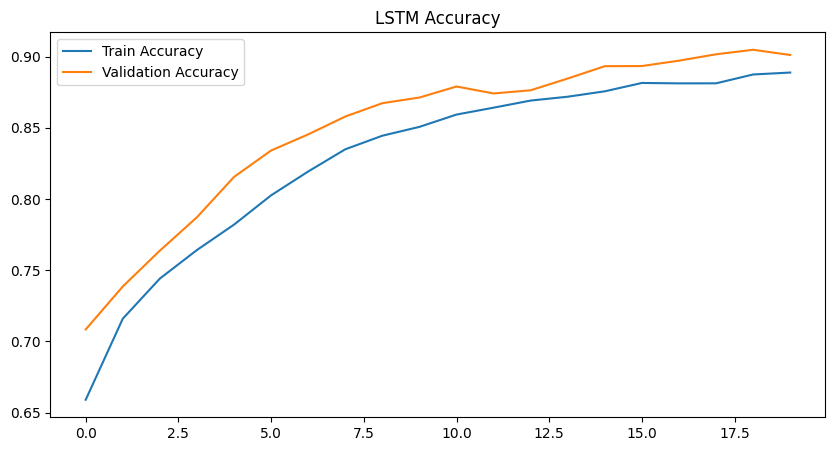

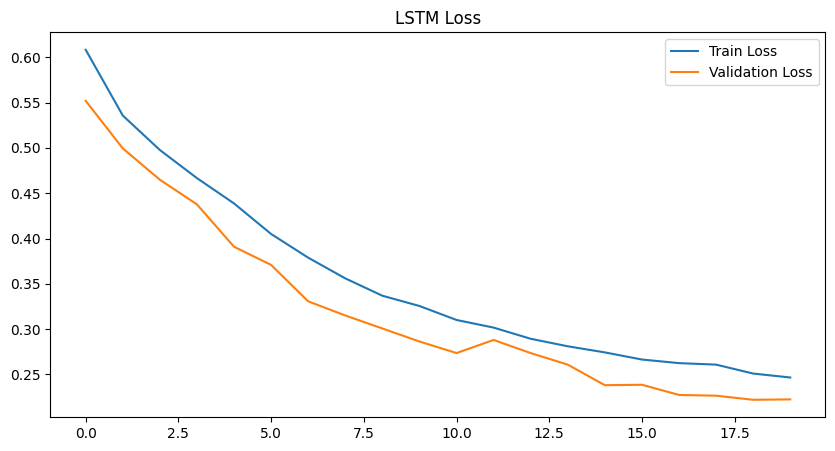

Cross-Validation Results:
    train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0             0.603531           0.000623           0.603835          0.000581
1             0.536705           0.000553           0.537018          0.000475
2             0.481040           0.000543           0.481372          0.000529
3             0.422436           0.000450           0.422755          0.000430
4             0.382358           0.000453           0.382693          0.000549
..                 ...                ...                ...               ...
95            0.002012           0.000117           0.002691          0.000425
96            0.002001           0.000118           0.002684          0.000424
97            0.001994           0.000119           0.002684          0.000424
98            0.001986           0.000120           0.002680          0.000425
99            0.001977           0.000120           0.002674          0.000425

[100 rows x 4 columns]
Be

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results After Cross-Validation
Accuracy: 0.9985734664764622
Confusion Matrix:
 [[5755    9]
 [   5 4045]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5764
           1       1.00      1.00      1.00      4050

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



<Figure size 1000x700 with 0 Axes>

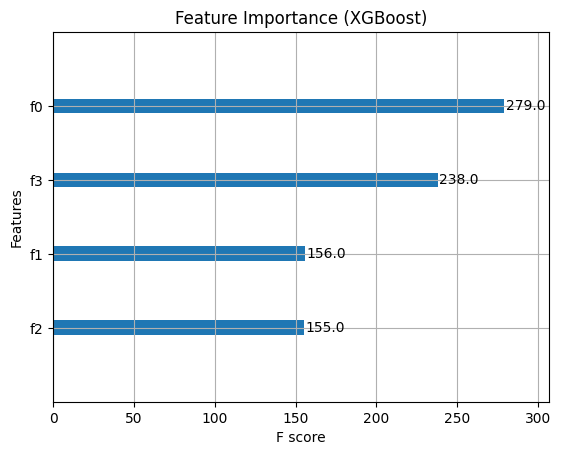

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBClassifier, DMatrix, cv
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('covid_19_clean_complete.csv')

# Step 2: Feature Engineering
# Creating sequential features with sliding window
# Rolling averages and week-over-week change
data['Lag_7_Confirmed'] = data['Confirmed'].shift(7).fillna(0)
data['Lag_14_Confirmed'] = data['Confirmed'].shift(14).fillna(0)
data['WoW_Change'] = np.where(
    data['Lag_7_Confirmed'] == 0, 0,
    (data['Confirmed'] - data['Lag_7_Confirmed']) / data['Lag_7_Confirmed']
)
data['Is_Americas'] = np.where(data['WHO Region'] == 'Americas', 1, 0)
# Target variable: Surge
data['Surge'] = (data['Confirmed'] > data['Lag_7_Confirmed'] * 1.15).astype(int)

# Dropping rows where lag features are missing
data.dropna(subset=['Lag_7_Confirmed', 'Lag_14_Confirmed'], inplace=True)

# Step 3: Prepare Data for Models
# Selecting features
features = ['Confirmed', 'Lag_7_Confirmed', 'Lag_14_Confirmed', 'WoW_Change', 'Is_Americas']
X = data[features].replace([np.inf, -np.inf], 0).fillna(0)
y = data['Surge']

# Standardize the features for LSTM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data into sequences for LSTM
def create_sequences(X, y, sequence_length=7):
    X_seq, y_seq = [], []
    for i in range(sequence_length, len(X)):
        X_seq.append(X[i-sequence_length:i])
        y_seq.append(y.iloc[i])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 7
X_seq, y_seq = create_sequences(X_scaled, y)

# Step 4: Train-Test Split
# LSTM data split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

# XGBoost data split (no sequences)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=2
)

# Evaluate the LSTM model
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype(int)

print("LSTM Results")
print("Accuracy:", accuracy_score(y_test_lstm, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test_lstm, y_pred_lstm))
print("Classification Report:\n", classification_report(y_test_lstm, y_pred_lstm))

# Plot LSTM Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('LSTM Accuracy')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM Loss')
plt.show()

# Step 6: XGBoost Model with Cross-Validation
# Handle class imbalance for XGBoost using scale_pos_weight
scale_pos_weight = y_train_xgb.value_counts()[0] / y_train_xgb.value_counts()[1]

# Define XGBoost parameters
xgb_params = {
    "objective": "binary:logistic",
    "learning_rate": 0.1,
    "max_depth": 6,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss",
    "seed": 42,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "min_child_weight": 5,
}

# Create DMatrix for XGBoost
dtrain = DMatrix(X_scaled, label=y)

# Perform cross-validation with 5 folds
cv_results = cv(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=5,
    stratified=True,
    early_stopping_rounds=20,
    metrics="logloss",
    as_pandas=True,
    seed=42
)

print("Cross-Validation Results:")
print(cv_results)

# Display the best iteration and corresponding logloss
best_iteration = len(cv_results)
best_logloss = cv_results["test-logloss-mean"].min()
print(f"Best iteration: {best_iteration}")
print(f"Best logloss: {best_logloss}")

# Train the final model using the best iteration
xgb_model = XGBClassifier(
    n_estimators=best_iteration,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict using the final model
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate the XGBoost model
print("XGBoost Results After Cross-Validation")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_xgb, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

# Plot Feature Importance
plt.figure(figsize=(10, 7))
plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance (XGBoost)')
plt.show()

The above features correspond with this

f0 = Confirmed
f1 = Lag_7_Confirmed
f2 = Lag_14_Confirmed
f3 = WoW_Change